
*** Data Science Capstone Project Presentation***
---
### In fulfillment of Simplilearn Master Data Science Certification course

## Project_name: Healthcare - NIDDK (National Institute of Diabetes and Digestive and Kidney Diseases)
---
Presenter_:_***Samuel_Y._Ntsua***

### Trainer and Mentor : **TBD**

** install packages :   
** remotezip : for query and download zip folder from a url   
** plotly, seaborn :  interactive graphs   
** cufflinks : connects plotly with pandas to create graphs and charts of dataframes directly   
** textblob : process textual data  
** missingno : visualize missing data  
** scikit-learn : missing data treatment and model evaluation  
** pandas-profiling: detailed EDA.  
** In addition to these, we will be installing other libraries down the road, as and when they are needed.

In [ ]:
# %pip install remotezip cufflinks plotly textblob seaborn missingno  # Commented out because this is needed only once.
%pip install remotezip cufflinks plotly textblob seaborn missingno

In [ ]:
%pip install pandas_profiling[notebook]
%conda install -c conda-forge scikit-learn pandas-profiling

Checking content of zip folder so I can determine a strategy to load files

In [1]:
%lsmagic

Available line magics:
%alias  %alias_magic  %autoawait  %autocall  %automagic  %autosave  %bookmark  %cd  %clear  %cls  %colors  %conda  %config  %connect_info  %copy  %ddir  %debug  %dhist  %dirs  %doctest_mode  %echo  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %macro  %magic  %matplotlib  %mkdir  %more  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %pip  %popd  %pprint  %precision  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %ren  %rep  %rerun  %reset  %reset_selective  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%cmd  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%markdown  %%perl  %%prun  %%pypy  %%python 

In [2]:
# Ignore harmless warnings
import warnings
warnings.filterwarnings('ignore')
# Imports
import os, pandas as pd, numpy as np, seaborn as sns, plotly.express as px, cufflinks as cf, matplotlib.pyplot as plt, missingno as missno
#os.listdir("Project2")

** Check the content of the ziped folder located on github

In [3]:
from remotezip import RemoteZip
with RemoteZip('https://github.com/Simplilearn-Edu/Data-Science-Capstone-Projects/raw/master/Project_2.zip') as hczip :
    for hcfiles in hczip.infolist():
        print(hcfiles.filename)

Project 2/
Project 2/Case Study - healthcare Industry.docx
Project 2/Healthcare - Diabetes/
Project 2/Healthcare - Diabetes/Case Study - healthcare Industry.docx
Project 2/Healthcare - Diabetes/health care diabetes.csv
Project 2/healthcare appointment data.csv
Project 2/train.csv


**Now that we see the contents, we can grab the specific file we need for this project.

In [4]:
with RemoteZip('https://github.com/Simplilearn-Edu/Data-Science-Capstone-Projects/raw/master/Project_2.zip') as hczip :    
   hczip.extract('Project 2/Healthcare - Diabetes/health care diabetes.csv')

**The file is now downloaded to my local machine at 'Project 2/Healthcare - Diabetes/health care diabetes.csv'  
** We can now load it with pandas  

In [5]:
hc_df = pd.read_csv('Project 2/Healthcare - Diabetes/health care diabetes.csv')

## Exploratory Data Analysis

** Descriptive analysis and data understanding

In [6]:
hc_df.shape

(768, 9)

In [7]:
type(hc_df)

pandas.core.frame.DataFrame

In [8]:
hc_df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

** Visual exploration and checking for missing data  
The project instruction indicates that a value of 0 in   
Glucose, BloodPressure, SkinThickness, Insulin, BMI are actually missing values  
So let's go ahead and set the 0s to np.nan   

In [9]:
# hc_df.columns = hc_df.columns.map(str.lower) # all column names to lowercase
zcol = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
#hc_df=hc_df[hc_df[zcol].astype(float)]
#hc_df=hc_df.astype({'Glucose':float, 'BloodPressure':float, 'SkinThickness':float, 'Insulin':float, 'BMI':float})

In [10]:
hc_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [11]:
hc_df[hc_df[zcol]==0]=np.nan

In [12]:
hc_df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

** The same information as above, but now in percentge  

In [13]:
round(100*(hc_df.isnull().sum() / len(hc_df)))

Pregnancies                  0.0
Glucose                      1.0
BloodPressure                5.0
SkinThickness               30.0
Insulin                     49.0
BMI                          1.0
DiabetesPedigreeFunction     0.0
Age                          0.0
Outcome                      0.0
dtype: float64

In [ ]:
# %history -g -f cmd_hist.py

In [14]:
# %lsmagic
%matplotlib inline

** To visualize how missing value in one column is related to another column,  
** let's plot the heatmap of the missingness.

<AxesSubplot:>

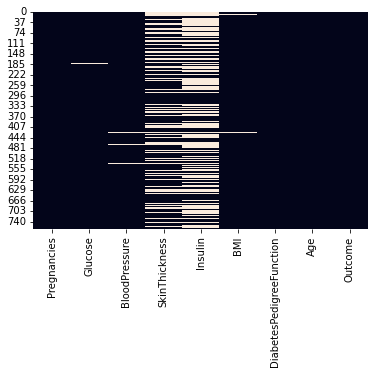

In [15]:
sns.heatmap(hc_df.isnull(),cbar=False)

** Furthermore, we can use missno's matrix to highlight places in each column where data is missing.

<AxesSubplot:>

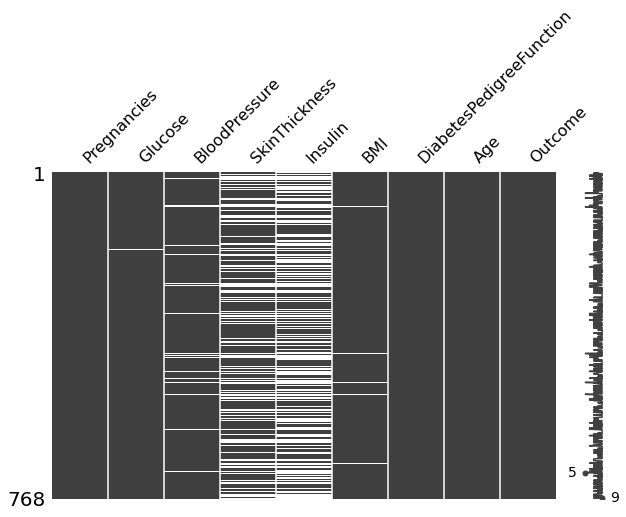

In [16]:
missno.matrix(hc_df,figsize=(10,6))

** Dropping missing a missing value from a column leads to dropping all other valid   
** values in the row corresponding to the missing value.   
** Dropping valid data will then lead to bias in the results.  
** To avoid such problem, we need to examine how much good data will be thrown out when a targeted missing data is dropped.  
** A correlation metrix between the missing variables can tell us the how one missing value is related to other non-missing values.  
** Below, we see the missno heatmap of missingness correlated matrix.  

<AxesSubplot:>

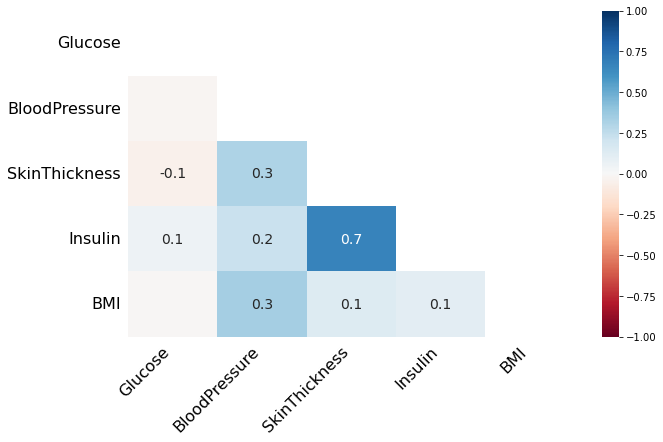

In [17]:
missno.heatmap(hc_df,figsize=(10,6))

** Likewise, a dendogram also show how one missing value in one column is related to non-missing value in another column.

<AxesSubplot:>

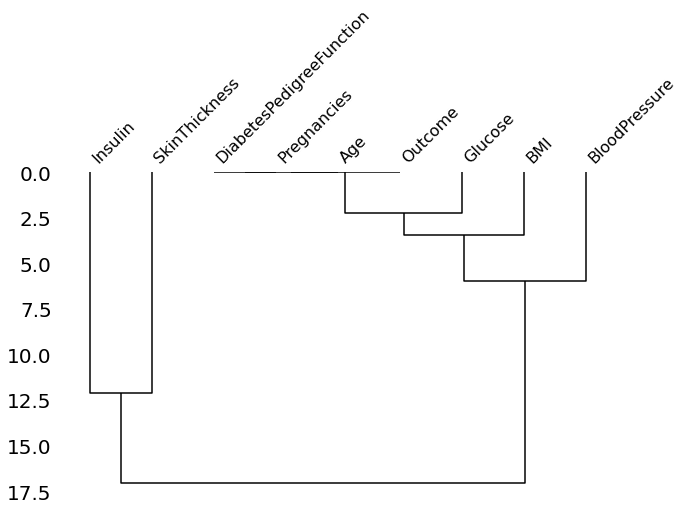

In [18]:
missno.dendrogram(hc_df,figsize=(10,6))

From the graphs above we can observe that:  
(1) `Insuline` and `SkinThinckness` are correlated (corr coef =0.7)  
(2) There are more missing data in `Insulin` and `SkinThickness`, but   
each time `Insulin` is missing `SkinThickness` is also missing, however, not the other way round.  
In theory, given this correlation, the absence of one of `Insulin` or `SkinThickness` will not affect the ability to predict  
the `Outcome` varibale. That is, one of the correlated variable can be expressed in termes of the other.   
But if we were to drop one, further analysis is needed to determine the one that is not a `principal component` contributing   
variation to `Outcome`. Furthermore, when two variables are correlated, it do not necessarily mean one of then is useless.   
In fact ,in this dataset, the measures of `Insulin` or `SkinThickness` were observed naturally as they occured on the patients.   
These observations suggest that dropping these missing values can lead to loosing data pont that would otherwise   
contribute to the accuracy of our analysis results.   
So for now we continue our analysis without dropping any variable.   
Going forward, we need to figure out how to handle the missing values then.   
Do we fill them with mean values? Probably not. Why?   
Although replacing almost half of the values with the mean value is not going the affect the mean of that same variable,   
it however reduces it's standard error, and so affecting its relationship with other variables in the dataset.   
Doing so will likely tilt the imputed mean towards the observed mean.   
Replacing missing values with the mean constitute a quick fix that will get me the project  
completed quickly, but it comes with flawed prediction capabilities.  
As such, I would not opt for that option.  
What else can be done without loosing predictive capability of the data?   

Now let's look at two other treatment methods of missing values:   
multiple imputation (`mi`) and maximum likelihood estimate (`mle`).   
`maximum likelihood estimate` `mle`:   
`mle` takes the row on which data is missing, then compare the non-missing values of that row to other non-missing   
value in the same column (within variable), then determines the closet of the set of non-missing values (the likelihood),  
and finally look up the corresponding value in the missing value's column to replace the actual missing value.   
Another way to view this is, if two subject have the same values of parameter except that one is missing for a subject,   
it is logical to replace the missing value with the corresponding parameter of the other subject.   
Problem with `mle` treatment of missing value   
`mle` does not impute data.   
Given the description of the method above, it is clear that the replacement of the missing value is `linear` in nature,   
and therefore `mle` applies to linear models only.   
`multiple imputation` `mi`:   
As the name suggests, `mi` imputes multiple times, that is, it takes multiple and different samples (of same size)   
from the original data (nonparametric bootstrap), compute an estimator $\hat{X_{i}}$ of the missing value from each sample,   
then based on the assumption that, the missing value we are trying to figure out follows the same distribution as  $\hat{X_{i}}$,   
we compute an estimate $\bar{x}$ of the missing value.   
Statistical software like Stata, SAS, SPSS and R implement various computation methods of `mi`.   
In Python I am going to use scikit-learn implementation (IterativeImputer), even though it is still experimental as of today.   

In [19]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [20]:
imp = IterativeImputer(random_state=100)
imp.fit(hc_df)

IterativeImputer(random_state=100)

In [21]:
imputed_hc_df = pd.DataFrame(imp.transform(hc_df), columns=hc_df.columns)

In [22]:
round(100*(imputed_hc_df.isnull().sum() / len(imputed_hc_df)))

Pregnancies                 0.0
Glucose                     0.0
BloodPressure               0.0
SkinThickness               0.0
Insulin                     0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
Outcome                     0.0
dtype: float64

### Now that we have full dataset, we can steam forward  with more data exploration.  

** Let's look at the Mean, std, min, max and quantiles of `before imputation`, for both `Outcome` ==0 and `Outcome` ==1

In [23]:
hc_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,763.0,121.686763,30.535641,44.000,99.00000,117.0000,141.00000,199.00
BloodPressure,733.0,72.405184,12.382158,24.000,64.00000,72.0000,80.00000,122.00
SkinThickness,541.0,29.153420,10.476982,7.000,22.00000,29.0000,36.00000,99.00
Insulin,394.0,155.548223,118.775855,14.000,76.25000,125.0000,190.00000,846.00
BMI,757.0,32.457464,6.924988,18.200,27.50000,32.3000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


The above output of `mean` and  `max` implies that there are some extremes values in the dataset.  
For instance, `Pregnancies` has a max value of 17.  
This suggests someone in the dataset was pregnant 17 times! Is this realistc?  
`Insulin` also seems to have an extreme case.  
Let's look at the historgram of the variable to see if there are extreme cases to worry about.  

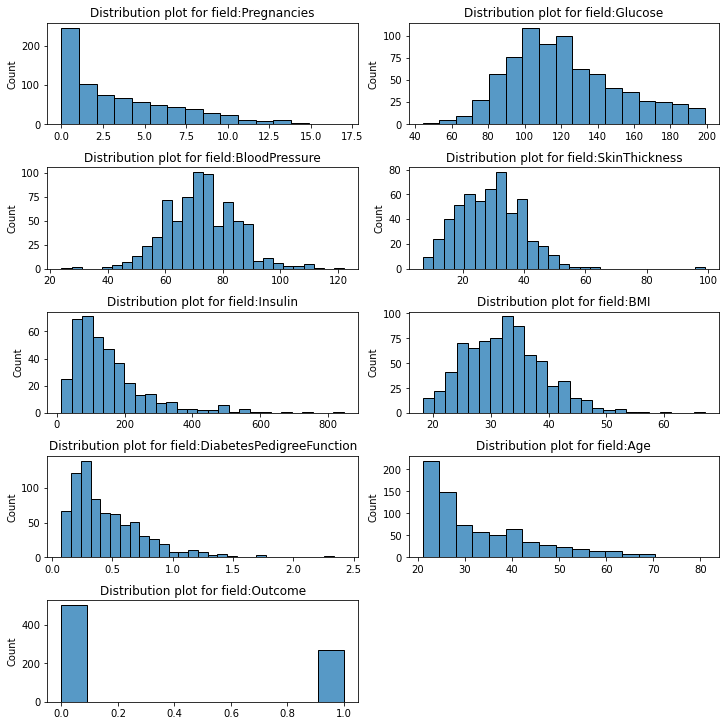

In [24]:
plt.figure(figsize=(10, 10))

for i, c in enumerate(hc_df.columns):
    plt.subplot(5,2,i+1)
    sns.histplot(hc_df[c])
    plt.title('Distribution plot for field:' + c)
    plt.xlabel('')
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

Looking at the graph above, two cases of `Pregnancies` and `Insulin` need explanation:   
`Pregnancies` : Even though it seems unusual for humans to be pregnant 17 times, the the graph shows no gap between  
the max value of 17 and the rest of the group. This suggest it is not an outlier case.    
`Insulin`: there are a few observations in the same region as the max value of 846.  
Even though these values are extremely high, the `75 percentile` shows that 75% of the data has value less than 190  
Furthermore, the `mean` of `155` and `standard deviation` of `118` shows that the bulk of the data are within normal range.  
Thus, the values of `Insulin` in the region of 800 will not significantly affect the overall statistical validity of that variable.  
`SkinThickness` and `MBI` seem a little skewed, but not to the level that warrant correction before analysis. 

** Mean, std, min, max and quantiles of `before imputation`, for `Outcome==0`

In [25]:
hc_df[hc_df['Outcome']==0].describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,500.0,3.298000,3.017185,0.000,1.00000,2.000,5.00000,13.000
Glucose,497.0,110.643863,24.776906,44.000,93.00000,107.000,125.00000,197.000
BloodPressure,481.0,70.877339,12.161223,24.000,62.00000,70.000,78.00000,122.000
SkinThickness,361.0,27.235457,10.026491,7.000,19.00000,27.000,33.00000,60.000
Insulin,264.0,130.287879,102.482237,15.000,66.00000,102.500,161.25000,744.000
BMI,491.0,30.859674,6.560737,18.200,25.60000,30.100,35.30000,57.300
DiabetesPedigreeFunction,500.0,0.429734,0.299085,0.078,0.22975,0.336,0.56175,2.329
Age,500.0,31.190000,11.667655,21.000,23.00000,27.000,37.00000,81.000
Outcome,500.0,0.000000,0.000000,0.000,0.00000,0.000,0.00000,0.000


** Mean, std, min, max and quantiles of `before imputation`, for `Outcome==1`

In [26]:
hc_df[hc_df['Outcome']==1].describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,268.0,4.865672,3.741239,0.000,1.7500,4.000,8.000,17.00
Glucose,266.0,142.319549,29.599199,78.000,119.0000,140.000,167.000,199.00
BloodPressure,252.0,75.321429,12.299866,30.000,68.0000,74.500,84.000,114.00
SkinThickness,180.0,33.000000,10.327595,7.000,27.0000,32.000,39.000,99.00
Insulin,130.0,206.846154,132.699898,14.000,127.5000,169.500,239.250,846.00
BMI,266.0,35.406767,6.614982,22.900,30.9000,34.300,38.925,67.10
DiabetesPedigreeFunction,268.0,0.550500,0.372354,0.088,0.2625,0.449,0.728,2.42
Age,268.0,37.067164,10.968254,21.000,28.0000,36.000,44.000,70.00
Outcome,268.0,1.000000,0.000000,1.000,1.0000,1.000,1.000,1.00


`Differences` of (Mean, std, min, max and quantiles) `before and after inputation`:  
* We compute and compare the differences for `Outcome==0` and `Outcome==1`   

** Computation for `Outcome==0`

In [27]:
round(imputed_hc_df[imputed_hc_df['Outcome']==0].describe().T -  hc_df[hc_df['Outcome']==0].describe().T ,4)

,count,mean,std,min,25%,50%,75%,max
Pregnancies,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0
Glucose,3.0,-0.0608,-0.0550,0.0000,0.0000,0.0000,0.0000,0.0
BloodPressure,19.0,-0.0802,-0.1986,0.0000,0.4921,0.0000,0.0000,0.0
SkinThickness,139.0,-0.2774,-0.8908,0.0000,1.0000,-0.2169,-0.8233,0.0
Insulin,236.0,-3.3301,-18.9441,-34.5017,7.8282,7.5000,-4.6201,0.0
BMI,9.0,-0.0049,-0.0590,0.0000,0.1500,0.1147,0.0000,0.0
DiabetesPedigreeFunction,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0
Age,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0
Outcome,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0


** Comment for `Outcome==0`:  
* `count`: We successfully augmented the count for `SkinThickness`, `Insulin`, `BloodPressure`, `Glucose` and `MBI`   
as shown in the first column of the table above  
* `mean`,`std`, `min`, `max` and `quantiles`: Given the magnitude of range (`max` - `min`) shown in the `before inputation`,   
`744-14 for Insulin, for instance`, it appears the before/after difference for `mean`, `std`, `min`, `max` and `quantiles`   
are quite small.  

** Computation for `Outcome==1`

In [28]:
round(imputed_hc_df[imputed_hc_df['Outcome']==1].describe().T -  hc_df[hc_df['Outcome']==1].describe().T ,4)

,count,mean,std,min,25%,50%,75%,max
Pregnancies,0.0,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0
Glucose,2.0,0.0003,-0.1110,0.0,0.0000,0.5000,0.0000,0.0
BloodPressure,16.0,-0.0706,-0.3211,0.0,0.0000,-0.5000,-2.0000,0.0
SkinThickness,88.0,-0.4615,-1.1542,0.0,0.0000,0.0000,-1.1387,0.0
Insulin,138.0,-6.1658,-29.5186,0.0,3.4362,8.5752,0.9089,0.0
BMI,2.0,-0.0049,-0.0239,0.0,0.0000,0.0000,-0.1500,0.0
DiabetesPedigreeFunction,0.0,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0
Age,0.0,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0
Outcome,0.0,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0


** Comment for `Outcome==1`: 

- `count`: We successfully augmented the count for `SkinThickness`, `Insulin`, `BloodPressure`, `Glucose` and `MBI`   
as shown in the first column of the table above  
- `mean`,`std`, `min`, `max` and `quantiles`: Given the magnitude of range (`max` - `min`) shown in the `before imputation`,   
`846-14 for Insulin, for instance`, it appears the before/after difference for `mean`, `std`, `min`, `max` and `quantiles`   
are quite small.  

In conclusion, we can say the imputation has successfully improved the data without loosing any case.  

But that does not mean that a thoughtfully imputed dataset guarantees a representative analysis result.  
If there are significantly more of a particular outcome that others, the analysis results will be skewed  
if the dataset is not balance or a probability weight is not introduced.   
Let's see how balanced is the data after imputation.  

In [29]:
print("Count for Outcome types : \n", imputed_hc_df['Outcome'].value_counts())

Count for Outcome types : 
 0.0    500
1.0    268
Name: Outcome, dtype: int64


Text(0, 0.5, 'Count of Outcome types')

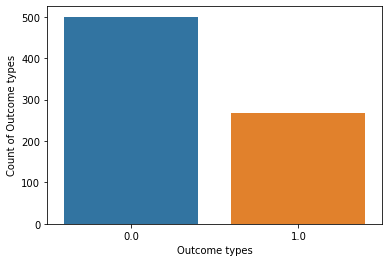

In [30]:
sns.countplot(imputed_hc_df['Outcome'])
plt.xlabel('Outcome types')
plt.ylabel('Count of Outcome types')

The graph above show that about `2/3` of `Outcome` is `0` or `negative outcome`.  
This implies that if we were to predict a 0 (negative outcome), we would have achieve an accuracy of 75% with the imbalanced data.  

The data is imbalanced. Data imbalance can be addressed during (a) the analysis and interpretation   
of results, including resampling methods or (b) at the model performance and evaluation metrics level,  
including changing the metric and penalizing the algorithm computing the metric.  

** For this project, we are going to utilize the resampling method to balance the dataset.**  

In [31]:
# ! pip install imbalanced-learn
from sklearn.utils import resample
outcome_maj = imputed_hc_df[imputed_hc_df.Outcome==0]
outcome_min = imputed_hc_df[imputed_hc_df.Outcome==1]
upsample_outcome_min = resample(outcome_min, replace =True, n_samples = outcome_maj.shape[0], random_state= 9876)
#We can now put the balanced and imputed dataset together
bal_imp_hc_df = pd.concat([outcome_maj, upsample_outcome_min])
# Count

In [32]:
print('Count of the values of Outcome :\n',bal_imp_hc_df.Outcome.value_counts())

Count of the values of Outcome :
 0.0    500
1.0    500
Name: Outcome, dtype: int64


Text(0, 0.5, 'Count of Outcome types')

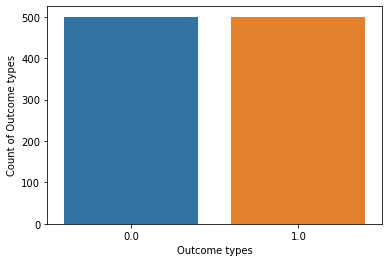

In [33]:
sns.countplot(bal_imp_hc_df.Outcome)
plt.xlabel('Outcome types')
plt.ylabel('Count of Outcome types')

After oversampling the minority class, we now have `Outcome` values to be 50/50.

In [34]:
print('The shape of the data after oversampling \n {}'.format(bal_imp_hc_df.shape))

The shape of the data after oversampling 
 (1000, 9)


In [35]:
bal_imp_hc_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 1 to 124
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               1000 non-null   float64
 1   Glucose                   1000 non-null   float64
 2   BloodPressure             1000 non-null   float64
 3   SkinThickness             1000 non-null   float64
 4   Insulin                   1000 non-null   float64
 5   BMI                       1000 non-null   float64
 6   DiabetesPedigreeFunction  1000 non-null   float64
 7   Age                       1000 non-null   float64
 8   Outcome                   1000 non-null   float64
dtypes: float64(9)
memory usage: 94.3 KB


Text(0.5, 1.0, 'Pair scatter plots between variables')

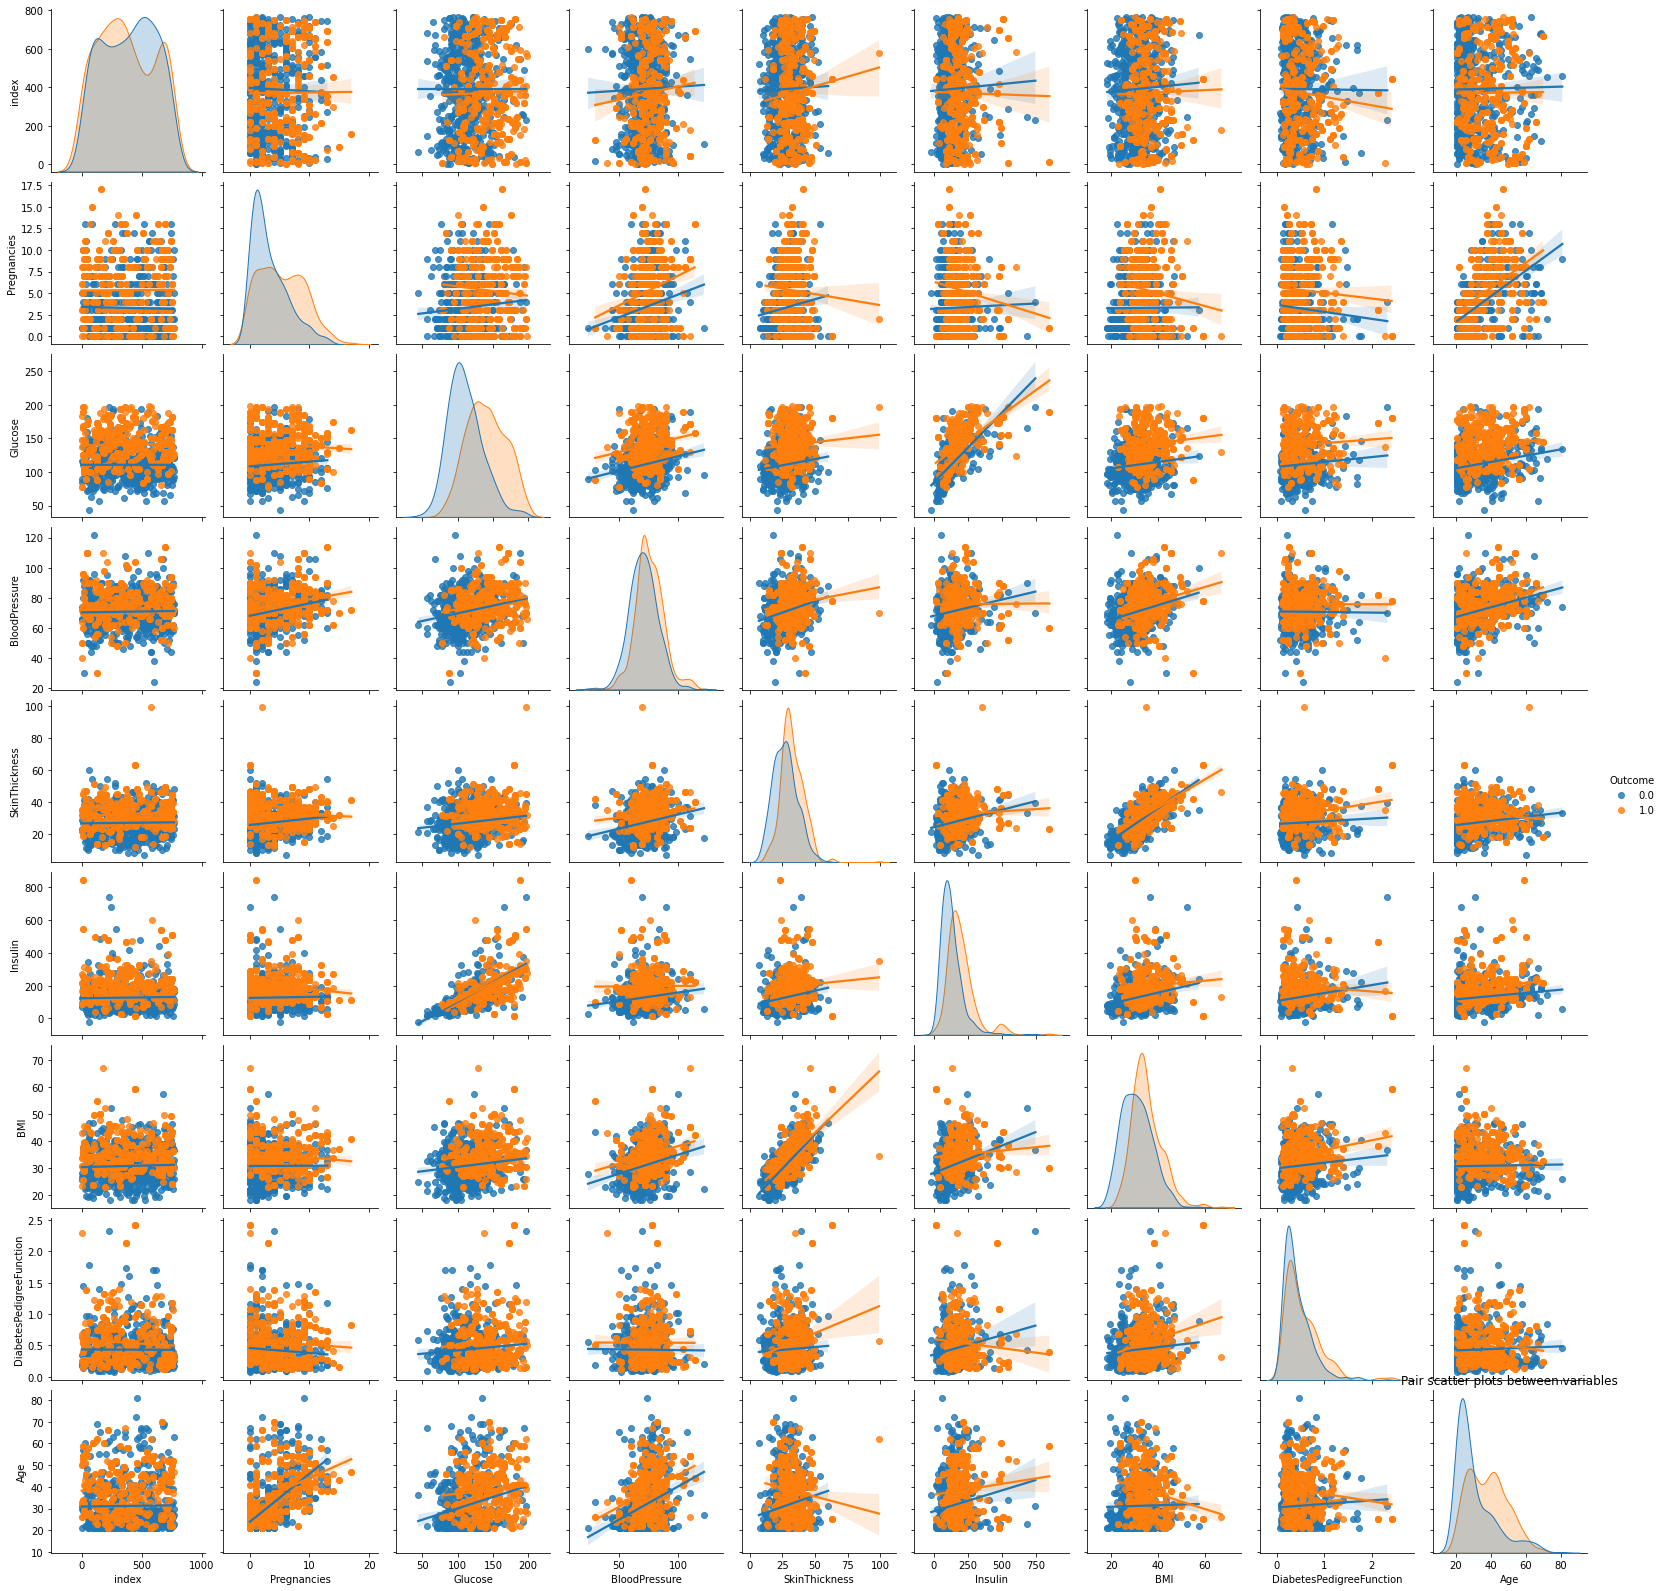

In [38]:
sns.pairplot(bal_imp_hc_df.reset_index(), hue='Outcome', diag_kind='kde', kind = 'reg')
plt.title('Pair scatter plots between variables')


Frem the pairplot above, it appears there is a slight correlation between :   
a-) `Glucose` and `Insulin`   
b-) `SkinThickness` and `BMI`   

Let's graph the correlation matrix too to confirm the above observation.  

<AxesSubplot:>

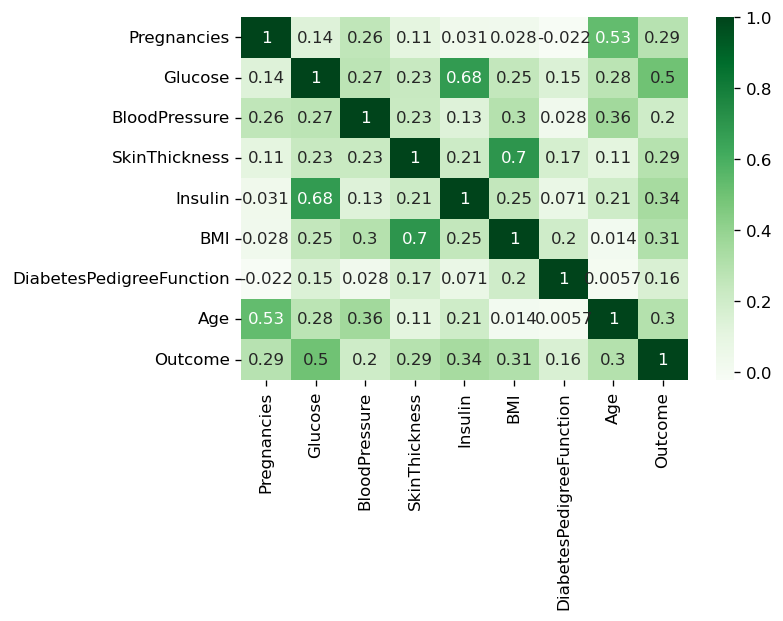

In [39]:
# Correlation heatmap
plt.figure(dpi=120)
sns.heatmap(bal_imp_hc_df.corr(), annot=True,cmap='Greens')

In [40]:
bal_imp_hc_df.corr()['Outcome']

Pregnancies                 0.287039
Glucose                     0.497589
BloodPressure               0.204070
SkinThickness               0.291594
Insulin                     0.344833
BMI                         0.308442
DiabetesPedigreeFunction    0.160550
Age                         0.300631
Outcome                     1.000000
Name: Outcome, dtype: float64

As expected, the correlation matrix show the highest correlated pairs are :   
`Glucose` and `Insulin`  0.68   
`SkinThickness` and `BMI` 0.7   
The lest correlated pair are `Age` and `DiabetesPedigreeFunction` 0.0057.  

Taking the factors individually, the most correlated to `Outcome` is `Glucose` (no surprise there)   
followed by `Insulin`, then `BMI`, then `Age`, then `Pregnancies` and `Skinthickness` and   
the least correlated with `Outcome` is `DiabetesPedigreeFunction`.  
This ranking also gives us a rought indication of the princial components that, together, would bring the most variations   
to `Outcome`, thus the best prediction power.

## Data Modeling
Our data has labels, that is, `Outcome` variable.  
We can therefore use a supervised learning algorithms to try to understand the relationship between:   
(a) 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age' on one side and   
(b) `Outcome` on the other side.  
 
Given the variables in `(a)`, we are trying to determine if a patient has diabetes `(Outcome ==1)` or not `(Outcome==0)`  
This is a classification problem.  
Now, which of the classification algorithms will give us the best prediction model?  
The figure below from scikit-lean website shows us the path decide.  

![Choosing the right ML estimator](https://scikit-learn.org/stable/_static/ml_map.png)

To figure out which classification model will yield the best prediction of `Outcome`,  
we can train test a few classification model then evaluate the performance then choose the highest performing model.  

# Strategies for model building and selection.  
We will attempt several models to see their performance using Area Under the Curve score (AUC).  
We will then choose the best performing model (or combination of model).  
  
Following scikit-learn's diagram above, I will model the data with the following 5 `estimators` :   
1) Support Vector machines (SVM)   
2) KNeighbors Classifier   
3) three (3) Ensemble Classifiers (RandomForestClassifier, ExtraTreesClassifier and XGBoost)  


In the first round of model selection, I will look at the `performance report card`  of the `estimators`:  
`precision`, `recall` and `f1-score`.  
The top 3 estimators will then be further evaluated by `parameter tuning` for their individual best performance on the data   
Then they will be ranked by their `AUC score`.  

**Split,Train and evaluate

In [ ]:
## Model algorights to test on data
# !pip install xgboost (if not already installed)
%pip install xgboost
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
import xgboost as xgb 
from xgboost import XGBClassifier

# Methods for model Selection
from sklearn.model_selection import train_test_split, KFold, cross_val_score,GridSearchCV
# Methods for model performance evaluation
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score, mean_squared_error


In [44]:
X, y = bal_imp_hc_df.drop('Outcome',axis=1), bal_imp_hc_df['Outcome']
X_train, X_test, y_train, y_test = train_test_split( X , y, test_size=0.3, random_state=9876)

In [45]:
print(f'Shape of the training and testing splits: \n X_train ==> {X_train.shape} \n X_test ==> {X_test.shape} \n y_train ==> {y_train.shape}  \n y_test ==> {y_test.shape}')

Shape of the training and testing splits: 
 X_train ==> (700, 8) 
 X_test ==> (300, 8) 
 y_train ==> (700,)  
 y_test ==> (300,)


## Performance report card:Precision, recall  and f1-score

##### Performance report card:  Support Vector Machines

In [46]:
model = SVC()
model.fit(X_train, y_train)
y_train_hat = model.predict(X_train)
y_test_hat = model.predict(X_test)

print(model)
print(f'Train performance \n ====================================================' )
print(classification_report(y_train, y_train_hat))

print(f'Test performance \n ====================================================' )
print(classification_report(y_test, y_test_hat))

print(f'Roc_auc score \n ====================================================' )
print(roc_auc_score(y_test, y_test_hat))

SVC()
Train performance 
              precision    recall  f1-score   support

         0.0       0.80      0.69      0.74       346
         1.0       0.73      0.83      0.78       354

    accuracy                           0.76       700
   macro avg       0.77      0.76      0.76       700
weighted avg       0.77      0.76      0.76       700

Test performance 
              precision    recall  f1-score   support

         0.0       0.76      0.64      0.69       154
         1.0       0.67      0.79      0.73       146

    accuracy                           0.71       300
   macro avg       0.72      0.71      0.71       300
weighted avg       0.72      0.71      0.71       300

Roc_auc score 
0.7120174346201744


#####  Performance report card: K-Neighbors

In [47]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)
y_train_hat = model.predict(X_train)
y_test_hat = model.predict(X_test)

print(model)
print(f'Train performance \n ====================================================' )
print(classification_report(y_train, y_train_hat))

print(f'Test performance \n ====================================================' )
print(classification_report(y_test, y_test_hat))

print(f'Roc_auc score \n ====================================================' )
print(roc_auc_score(y_test, y_test_hat))

KNeighborsClassifier()
Train performance 
              precision    recall  f1-score   support

         0.0       0.88      0.75      0.81       346
         1.0       0.79      0.90      0.84       354

    accuracy                           0.83       700
   macro avg       0.83      0.82      0.82       700
weighted avg       0.83      0.83      0.82       700

Test performance 
              precision    recall  f1-score   support

         0.0       0.84      0.66      0.74       154
         1.0       0.71      0.86      0.78       146

    accuracy                           0.76       300
   macro avg       0.77      0.76      0.76       300
weighted avg       0.77      0.76      0.76       300

Roc_auc score 
0.7626756804838997


##### Performance report card: Random Forest

In [48]:
model = RandomForestClassifier(n_jobs=-1,random_state=9876)
model.fit(X_train, y_train)
y_train_hat = model.predict(X_train)
y_test_hat = model.predict(X_test)
print(model)
print(f'Train performance \n ====================================================' )
print(classification_report(y_train, y_train_hat))

print(f'Test performance \n ====================================================' )
print(classification_report(y_test, y_test_hat))

print(f'Roc_auc score \n ====================================================' )
print(roc_auc_score(y_test, y_test_hat))

RandomForestClassifier(n_jobs=-1, random_state=9876)
Train performance 
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       346
         1.0       1.00      1.00      1.00       354

    accuracy                           1.00       700
   macro avg       1.00      1.00      1.00       700
weighted avg       1.00      1.00      1.00       700

Test performance 
              precision    recall  f1-score   support

         0.0       0.94      0.76      0.84       154
         1.0       0.79      0.95      0.86       146

    accuracy                           0.85       300
   macro avg       0.86      0.85      0.85       300
weighted avg       0.86      0.85      0.85       300

Roc_auc score 
0.8524728695961572


##### Performance report card: Extra Trees

In [49]:
model = ExtraTreesClassifier(random_state=9876)
model.fit(X_train, y_train)
y_train_hat = model.predict(X_train)
y_test_hat = model.predict(X_test)
print(model)
print(f'Train performance \n ====================================================' )
print(classification_report(y_train, y_train_hat))

print(f'Test performance \n ====================================================' )
print(classification_report(y_test, y_test_hat))

print(f'Roc_auc score \n ====================================================' )
print(roc_auc_score(y_test, y_test_hat))

ExtraTreesClassifier(random_state=9876)
Train performance 
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       346
         1.0       1.00      1.00      1.00       354

    accuracy                           1.00       700
   macro avg       1.00      1.00      1.00       700
weighted avg       1.00      1.00      1.00       700

Test performance 
              precision    recall  f1-score   support

         0.0       0.91      0.80      0.85       154
         1.0       0.81      0.92      0.86       146

    accuracy                           0.86       300
   macro avg       0.86      0.86      0.86       300
weighted avg       0.86      0.86      0.86       300

Roc_auc score 
0.8582547589396905


##### Performance report card: XGBoost

In [50]:
model = XGBClassifier(random_state=9876)
model.fit(X_train, y_train)
y_train_hat = model.predict(X_train)
y_test_hat = model.predict(X_test)

print(model)
print(f'Train performance \n ====================================================' )
print(classification_report(y_train, y_train_hat))

print(f'Test performance \n ====================================================' )
print(classification_report(y_test, y_test_hat))

print(f'Roc_auc score \n ====================================================' )
print(roc_auc_score(y_test, y_test_hat))

[21:56:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=20,
              num_parallel_tree=1, predictor='auto', random_state=9876,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
Train performance 
              precision    re

# Parameter tuning: Model optimization.
Out of the 5 algorithms tested above, I will retain the best 3 AUC score.  
Random forest, XGBoost and ExtraTrees  
I will tune their parameters to increase AUC score, by uing cross-validation method `GridSearchCV`.

In [51]:
from sklearn.model_selection import GridSearchCV, KFold

##### Parameter tuning: Random forest

In [52]:
params = {
    'n_estimators': [100, 200, 400],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [1,2,4,5],
    'min_samples_leaf': [1,2,4,5],
    'max_leaf_nodes': [4,10,20,50,None]
}

rf_gs = GridSearchCV(RandomForestClassifier(n_jobs=-1,random_state=9876), params, n_jobs=-1, cv=KFold(n_splits=3), scoring='roc_auc')
rf_gs.fit(X_train, y_train)
y_pred = rf_gs.predict(X_test)
print(f'Best score for Random Forest:, {rf_gs.best_score_} \n Best parameters found for Random Forest: {rf_gs.best_params_}')

Best score for Random Forest:, 0.9211961442955007 
 Best parameters found for Random Forest: {'criterion': 'gini', 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 400}


##### AUC score: Randon Forest 

Area Under Curve: 0.853


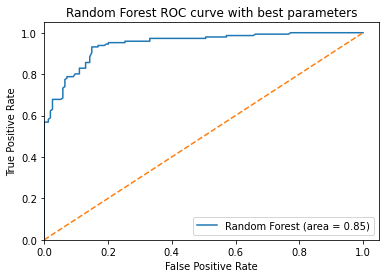

In [53]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
rf_roc_auc = roc_auc_score(y_test, rf_gs.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, rf_gs.predict_proba(X_test)[:,1]) 

plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc) 
plt.plot([0, 1], [0, 1],'--')
plt.xlim([0.0, 1.05])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC curve with best parameters') 
plt.legend(loc="lower right")
plt.savefig('RF_ROC')
print('Area Under Curve: %.3f' % rf_roc_auc)
plt.show()

##### Parameter tuning: XGBoost

In [54]:
params = {
    'n_estimators': [100, 200, 400],
    'learning_rate': [0.01,0.05,0.1],
    'booster': ['gbtree', 'gblinear'],
    'gamma': [0, 0.5, 1],
    'reg_alpha': [0, 0.5, 1],
    'base_score': [0.2, 0.5, 1]
}

xgb_gs = GridSearchCV(XGBClassifier(n_jobs=-1, random_state=9876), params, n_jobs=-1, cv=KFold(n_splits=3), scoring='roc_auc')
xgb_gs.fit(X_train, y_train)
print(f'Best score for XGBoost:, {xgb_gs.best_score_} \n Best parameters found for XGBoost: {xgb_gs.best_params_}')

[21:59:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best score for XGBoost:, 0.8942791755040348 
 Best parameters found for XGBoost: {'base_score': 0.2, 'booster': 'gbtree', 'gamma': 0, 'learning_rate': 0.1, 'n_estimators': 200, 'reg_alpha': 1}


##### AUC score: XGBoost 

Area Under Curve: 0.819


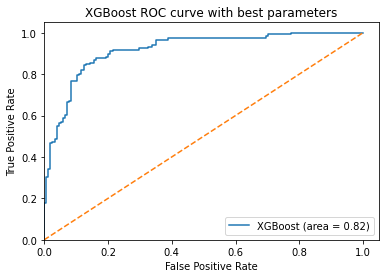

In [55]:
xgb_roc_auc = roc_auc_score(y_test, xgb_gs.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, xgb_gs.predict_proba(X_test)[:,1]) 

plt.figure()
plt.plot(fpr, tpr, label='XGBoost (area = %0.2f)' % xgb_roc_auc) 
plt.plot([0, 1], [0, 1],'--')
plt.xlim([0.0, 1.05])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost ROC curve with best parameters') 
plt.legend(loc="lower right")
plt.savefig('XGB_ROC')
print('Area Under Curve: %.3f' % xgb_roc_auc)
plt.show()

##### Parameter tuning: Extra Trees

In [56]:
params = {
    'n_estimators': [100, 200, 400],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [1,2,4,6],
    'min_samples_leaf': [1,2,4,6],
    'max_leaf_nodes': [4,10,20,40,None]
}

et_gs = GridSearchCV(ExtraTreesClassifier(n_jobs=-1, random_state=9876), params, n_jobs=-1, cv=KFold(n_splits=3), scoring='roc_auc')
et_gs.fit(X_train, y_train)
print(f'Best score for ExtraTrees:, {et_gs.best_score_} \n Best parameters found for ExtraTrees: {et_gs.best_params_}')

Best score for ExtraTrees:, 0.9333230375818872 
 Best parameters found for ExtraTrees: {'criterion': 'entropy', 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 400}


##### AUC score: Extra Trees

Area Under Curve: 0.855


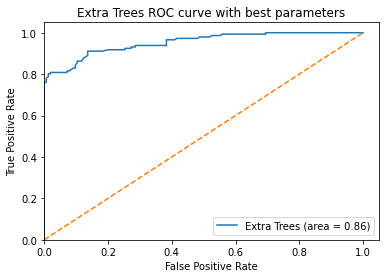

In [57]:
et_roc_auc = roc_auc_score(y_test, et_gs.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, et_gs.predict_proba(X_test)[:,1]) 

plt.figure()
plt.plot(fpr, tpr, label='Extra Trees (area = %0.2f)' % et_roc_auc) 
plt.plot([0, 1], [0, 1],'--')
plt.xlim([0.0, 1.05])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Extra Trees ROC curve with best parameters') 
plt.legend(loc="lower right")
plt.savefig('ET_ROC')
print('Area Under Curve: %.3f' % et_roc_auc)
plt.show()

**Conclusion: Model selection**  
We can see that Extra Trees has the best ability to predict with this dataset.  
With a AUC score of 86%, Extra Trees performed better than Random Forest 85%, then XGBoost with 82%.  
KNN didn't even make it to the top 3   